# Lesson 3 Assignment - Monty Hall Simulation
## Author - Connor Higgins

### Instructions
Simulate the conditional probabilities of the distributions for winning a car vs. a goat for the Monty Hall Problem that includes the following:
1. the cases of switching or not switching
2. histograms and summary statistics (at least mean and variance) of the results for winning the car or a goat for both strategies, switching or not switching
3. comparison of the cases to determine the best strategy
4. recommended strategy

#### Objective:

Taylor from Marketing is headed to Burbank, California to visit family and jokes about having a strategy to win a car on a game show. You advocate for making a wise decision and sticking with it. But Taylor needs to see the proof in the data to be convinced.


In [2]:
# Import libraries
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Task 1: Simulate First Door Pick for Contestant
Regardless of which door the Car is placed behind, there will always be two doors with Goats behind them and one door with a Car behind it. By naming the doors GoatDoor1, GoatDoor2, and CarDoor, rather than Door A, Door B, and Door C, we can generalize to any MontyHall scenario.

In [3]:
def Contestant1stDoorPick(n_contestants):
    
    """Simulating 1st door pick based on an entirely random decision for n_contestants"""
    
    door_probas = [1/3, # GoatDoor1
                   1/3, # CarDoor
                   1/3] # GoatDoor2
    
    return list(zip(['GoatDoor1', 'CarDoor', 'GoatDoor2'], np.random.multinomial(n_contestants, door_probas)))

Contestant1stDoorPick(10000) # Simulating 10,000 contestant decisions

[('GoatDoor1', 3366), ('CarDoor', 3361), ('GoatDoor2', 3273)]

### Task 2: Simulate Monty's Door Pick after Contestant's First Door Pick
After the contestant chooses a door, Monty must then open one of the other two remaining doors. As he cannot open the door with the car (CarDoor), he must choose a door with a goat (GoatDoor1 or GoatDoor2). 

#### 2.A. Simulating Monty's Door Pick if the Contestant Chooses a Goat Door
If the Contestant initially chooses GoatDoor1 or GoatDoor2, Monty will be forced to open the other door with a goat. Therefore, a contestant choosing either Goat Door results in a deterministic response from Monty. 

In [4]:
def ContestantGoatDoor1_MontyOpens(n_contestantsGoatDoor1):
    
    """Simulating Monty's door pick for n_contestants choosing GoatDoor1"""
    
    door_probas = [1.0] # Monty must open GoatDoor2
    
    return list(zip(['GoatDoor2'], np.random.multinomial(n_contestantsGoatDoor1, door_probas)))

def ContestantGoatDoor2_MontyOpens(n_contestantsGoatDoor1):
    
    """Simulating Monty's door pick for n_contestants choosing GoatDoor2"""
    
    door_probas = [1.0] # Monty must open GoatDoor1
    
    return list(zip(['GoatDoor1'], np.random.multinomial(n_contestantsGoatDoor1, door_probas)))

FirstDoorPicks = Contestant1stDoorPick(10000) # Simulating 10,000 contestant decisions
n_contestantsGoatDoor1 = FirstDoorPicks[0][1] # Obtaining all GoatDoor1 Picks
n_contestantsGoatDoor2 = FirstDoorPicks[2][1] # Obtaining all GoatDoor2 Picks

# Obtaining Monty Opens for n_contestant GoatDoor1 picks
GoatDoor1MontyOpens = ContestantGoatDoor1_MontyOpens(n_contestantsGoatDoor1) 

# Obtaining Monty Opens for n_contestant GoatDoor2 picks
GoatDoor2MontyOpens = ContestantGoatDoor2_MontyOpens(n_contestantsGoatDoor2)

print(GoatDoor1MontyOpens, GoatDoor2MontyOpens)
print("\n 10,000 Contestants Pick {} GoatDoor1's and {} GoatDoor2's\n".format(n_contestantsGoatDoor1, n_contestantsGoatDoor2),
      "Respectively, Monty Opens {} GoatDoor2's and {} GoatDoor1's".format(GoatDoor1MontyOpens[0][1], GoatDoor2MontyOpens[0][1]))

[('GoatDoor2', 3281)] [('GoatDoor1', 3362)]

 10,000 Contestants Pick 3281 GoatDoor1's and 3362 GoatDoor2's
 Respectively, Monty Opens 3281 GoatDoor2's and 3362 GoatDoor1's


#### 2.B. Simulating Monty's Door Pick if the Contestant Chooses the Car Door
If the Contestant initially chooses the CarDoor, Monty has the option of choosing to open either GoatDoor. As there is no benefit to choosing one GoatDoor over the other, we can presume Monty chooses a door at random.

In [5]:
def ContestantCarDoor_MontyOpens(n_contestantsCarDoor):
    
    """Simulating Monty's door open for n_contestants choosing the CarDoor"""
    
    door_probas = [1/2, # GoatDoor1
                   1/2] # GoatDoor2
    
    return list(zip(['GoatDoor1', 'GoatDoor2'], np.random.multinomial(n_contestantsCarDoor, door_probas)))


FirstDoorPicks = Contestant1stDoorPick(10000) # Simulating 10,000 contestant decisions
n_contestantsCarDoor = FirstDoorPicks[1][1] # Obtaining all CarDoor picks
CarDoorMontyOpens = ContestantCarDoor_MontyOpens(n_contestantsCarDoor) # Obtaining MontyOpens for each GoatDoor

CarDoorMontyOpensGoatDoor1 = CarDoorMontyOpens[0][1] # Obtaining total number of GoatDoor1's Monty Opens for 10,000 contestants
CarDoorMontyOpensGoatDoor2 = CarDoorMontyOpens[1][1] # Obtaining total number of GoatDoor2's Monty Opens for 10,000 contestants

print(CarDoorMontyOpens)
print("\n 10,000 Contestants Pick {} CarDoor's\n".format(n_contestantsCarDoor),
      "As a result, Monty Opens {} GoatDoor1's and {} GoatDoor2's".format(CarDoorMontyOpensGoatDoor1, CarDoorMontyOpensGoatDoor2))

[('GoatDoor1', 1662), ('GoatDoor2', 1693)]

 10,000 Contestants Pick 3355 CarDoor's
 As a result, Monty Opens 1662 GoatDoor1's and 1693 GoatDoor2's


### Task 3: Simulate Contestant Door Stay or Door Switch
After Monty opens a door, the Contestant is then given the option of either staying with their current door or moving to a new door.

#### 3.A. Contestants Stay with Original Door
If Contestants stay with their original door, then there is no further step in calculations. The door that Monty opens is irrelevant to the outcome.

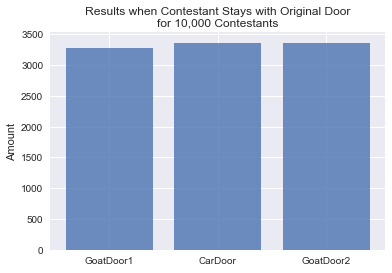

GoatDoor1 picks: 3274, CarDoor picks: 3363, GoatDoor2 picks: 3363
Experimental probability for winning Car: 0.3363
Theoretical probability for winning Car: 0.3333333333333333


In [6]:
FirstDoorPicks = Contestant1stDoorPick(10000) # Simulating 10,000 contestant decisions

DoorNames = (FirstDoorPicks[0][0], FirstDoorPicks[1][0], FirstDoorPicks[2][0]) # Obtaining Door Names
y_pos = np.arange(len(DoorNames)) # Creating range that matches number of Doors
NumberOfPicks = [FirstDoorPicks[0][1], FirstDoorPicks[1][1], FirstDoorPicks[2][1]] # Obtaining # of Picks per Door

# plotting results for 10,000 Contestants if they all stay with their original door
plt.bar(y_pos, NumberOfPicks, align='center', alpha=0.8) 
plt.xticks(y_pos, DoorNames)
plt.ylabel('Amount')
plt.title('Results when Contestant Stays with Original Door\nfor 10,000 Contestants')
plt.show()

print('GoatDoor1 picks: {}, CarDoor picks: {}, GoatDoor2 picks: {}'.format(NumberOfPicks[0], NumberOfPicks[1], NumberOfPicks[2]))
print('Experimental probability for winning Car: {}'.format(NumberOfPicks[1]/10000))
print('Theoretical probability for winning Car: {}'.format(1/len(DoorNames)))

#### 3.B. Contestants Switch to New Door
If Contestants switch to a new door, there are varying results depending on whether they originally choose the CarDoor. All results, however, are deterministic, as Monty has already eliminated a door.

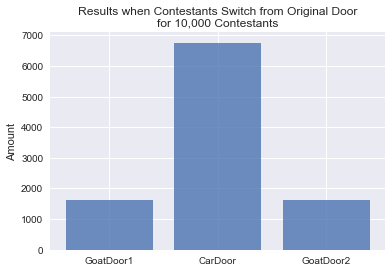

GoatDoor1 picks: 1631, CarDoor picks: 6756, GoatDoor2 picks: 1613
Experimental Probability of Winning a Car: 0.6756
Theoretical Probability of Winning a Car 0.6666666666666666

33.87% of Contestants switched from GoatDoor1 to the CarDoor
33.69% of Contestants switched from GoatDoor2 to the CarDoor
16.31% of Contestants switched from the CarDoor to GoatDoor1
16.13% of Contestants switched from the CarDoor to GoatDoor2


In [7]:
### Switch Functions ###

def ContestantGoatDoor1_MontyOpensGoatDoor2_Switch(n_contestantsGoatDoor1):
    
    """Simulating Contestant's Door Open if they switch from GoatDoor1"""
    
    door_probas = [1.0] # Contestant must open CarDoor
    
    return list(zip(['CarDoor'], np.random.multinomial(n_contestantsGoatDoor1, door_probas)))

def ContestantGoatDoor2_MontyOpensGoatDoor1_Switch(n_contestantsGoatDoor2):
    
    """Simulating Contestant's Door Open if they switch from GoatDoor2"""
    
    door_probas = [1.0] # Contestant must open CarDoor
    
    return list(zip(['CarDoor'], np.random.multinomial(n_contestantsGoatDoor2, door_probas)))


def ContestantCarDoor_MontyOpensGoatDoor1_Switch(CarDoorMontyOpensGoatDoor1):
    
    """Simulating Contestant's Door Open if they switch from CarDoor and Monty Opens GoatDoor1"""
    
    door_probas = [1.0] # Contestant must open GoatDoor2
    
    return list(zip(['GoatDoor2'], np.random.multinomial(CarDoorMontyOpensGoatDoor1, door_probas)))


def ContestantCarDoor_MontyOpensGoatDoor2_Switch(CarDoorMontyOpensGoatDoor2):
    
    """Simulating Contestant's Door Open if they switch from CarDoor and Monty Opens GoatDoor2"""
    
    door_probas = [1.0] # Contestant must open GoatDoor1
    
    return list(zip(['GoatDoor1'], np.random.multinomial(CarDoorMontyOpensGoatDoor2, door_probas)))


### Putting it all together ###

FirstDoorPicks = Contestant1stDoorPick(10000) # Simulating 10,000 contestant decisions

n_contestantsGoatDoor1 = FirstDoorPicks[0][1] # Obtaining all GoatDoor1 Picks
n_contestantsCarDoor = FirstDoorPicks[1][1]   # Obtaining all CarDoor Picks
n_contestantsGoatDoor2 = FirstDoorPicks[2][1] # Obtaining all GoatDoor2 Picks

# Obtaining Monty Opens for n_contestant GoatDoor1 picks (not used)
GoatDoor1MontyOpens = ContestantGoatDoor1_MontyOpens(n_contestantsGoatDoor1) 
# Obtaining Monty Opens for n_contestant GoatDoor2 picks (not used)
GoatDoor2MontyOpens = ContestantGoatDoor2_MontyOpens(n_contestantsGoatDoor2)
# Obtaining Monty Opens for n_contestant CarDoor picks (used)
CarDoorMontyOpens = ContestantCarDoor_MontyOpens(n_contestantsCarDoor)

CarDoorMontyOpensGoatDoor1 = CarDoorMontyOpens[0][1] # Obtaining total number of GoatDoor1's Monty Opens for 10,000 contestants
CarDoorMontyOpensGoatDoor2 = CarDoorMontyOpens[1][1] # Obtaining total number of GoatDoor2's Monty Opens for 10,000 contestants

# Obtaining all GoatDoor1 to CarDoor switches
GoatDoor1toCarDoorSwitch = ContestantGoatDoor1_MontyOpensGoatDoor2_Switch(n_contestantsGoatDoor1)
# Obtaining all GoatDoor2 to CarDoor switches
GoatDoor2toCarDoorSwitch = ContestantGoatDoor2_MontyOpensGoatDoor1_Switch(n_contestantsGoatDoor2)

# Obtaining all CarDoor to GoatDoor1 switches
CarDoortoGoatDoor1Switch = ContestantCarDoor_MontyOpensGoatDoor2_Switch(CarDoorMontyOpensGoatDoor1)
# Obtaining all CarDoor to GoatDoor2 switches
CarDoortoGoatDoor2Switch = ContestantCarDoor_MontyOpensGoatDoor1_Switch(CarDoorMontyOpensGoatDoor2)

# Obtaining all GoatDoor1 second door picks
GoatDoor1_2nd_picks = CarDoortoGoatDoor1Switch[0][1]
# Obtaining all CarDoor second door picks
CarDoor_2nd_picks = GoatDoor1toCarDoorSwitch[0][1] + GoatDoor2toCarDoorSwitch[0][1] # adding switches from both GoatDoor1 and 2
# Obtaining all GoatDoor2 second door picks
GoatDoor2_2nd_picks = CarDoortoGoatDoor2Switch[0][1]

# Creating a tuple list of second door picks
SecondDoorPicks = list(zip(['GoatDoor1', 'CarDoor', 'GoatDoor2'],
                           [GoatDoor1_2nd_picks, CarDoor_2nd_picks, GoatDoor2_2nd_picks]))


DoorNames = (SecondDoorPicks[0][0], SecondDoorPicks[1][0], SecondDoorPicks[2][0]) # Obtaining Door Names
y_pos = np.arange(len(DoorNames)) # Creating range that matches number of Doors
NumberOfPicks = [SecondDoorPicks[0][1], SecondDoorPicks[1][1], SecondDoorPicks[2][1]] # Obtaining # of Picks per Door

# plotting results for 10,000 Contestants if they all switch from their original door
plt.bar(y_pos, NumberOfPicks, align='center', alpha=0.8) 
plt.xticks(y_pos, DoorNames)
plt.ylabel('Amount')
plt.title('Results when Contestants Switch from Original Door\nfor 10,000 Contestants')
plt.show()

print('GoatDoor1 picks: {}, CarDoor picks: {}, GoatDoor2 picks: {}'.format(NumberOfPicks[0], NumberOfPicks[1], NumberOfPicks[2]))
print('Experimental Probability of Winning a Car: {}'. format(NumberOfPicks[1]/10000))
print('Theoretical Probability of Winning a Car {}'. format(2/3))

print('\n{}% of Contestants switched from GoatDoor1 to the CarDoor'.format(GoatDoor1toCarDoorSwitch[0][1]/100))
print('{}% of Contestants switched from GoatDoor2 to the CarDoor'.format(GoatDoor2toCarDoorSwitch[0][1]/100))
print('{}% of Contestants switched from the CarDoor to GoatDoor1'.format(CarDoortoGoatDoor1Switch[0][1]/100))
print('{}% of Contestants switched from the CarDoor to GoatDoor2'.format(CarDoortoGoatDoor2Switch[0][1]/100))

### Closing
From our simulation with 10,000 contestants, it is rather apparent that the winning option is to switch, as this will double a contestant's chance of winning a car. However, we can continue testing this with multiple realizations, allowing us to create distribtuions plots.

#### Creating a MontyHall function

In [8]:
def MontyHall(n_contestants):
    
    """Simulates the results of n_contestants playing the MontyHall game,
        both switching from and staying with their original doors"""
    
    FirstDoorPicks = Contestant1stDoorPick(n_contestants)

    n_contestantsGoatDoor1 = FirstDoorPicks[0][1] # GoatDoor1 Picked
    n_contestantsCarDoor = FirstDoorPicks[1][1]   # CarDoor Picked
    n_contestantsGoatDoor2 = FirstDoorPicks[2][1] # GoatDoor2 Picked

    CarDoorMontyOpens = ContestantCarDoor_MontyOpens(n_contestantsCarDoor) # Monty Opens GoatDoor when CarDoor picked

    CarDoorMontyOpensGoatDoor1 = CarDoorMontyOpens[0][1] # Monty Opens GoatDoor1
    CarDoorMontyOpensGoatDoor2 = CarDoorMontyOpens[1][1] # Monty Opens GoatDoor2

    GoatDoor1toCarDoorSwitch = ContestantGoatDoor1_MontyOpensGoatDoor2_Switch(n_contestantsGoatDoor1) # GoatDoor1 to CarDoor switches
    GoatDoor2toCarDoorSwitch = ContestantGoatDoor2_MontyOpensGoatDoor1_Switch(n_contestantsGoatDoor2) # GoatDoor2 to CarDoor switches

    CarDoortoGoatDoor1Switch = ContestantCarDoor_MontyOpensGoatDoor2_Switch(CarDoorMontyOpensGoatDoor1) # CarDoor to GoatDoor1 switches
    CarDoortoGoatDoor2Switch = ContestantCarDoor_MontyOpensGoatDoor1_Switch(CarDoorMontyOpensGoatDoor2) # CarDoor to GoatDoor2 switches
    
    GoatDoor1_2nd_picks = CarDoortoGoatDoor1Switch[0][1] # GoatDoor1 opened
    CarDoor_2nd_picks = GoatDoor1toCarDoorSwitch[0][1] + GoatDoor2toCarDoorSwitch[0][1] # CarDoor opened
    GoatDoor2_2nd_picks = CarDoortoGoatDoor2Switch[0][1] # GoatDoor2 opened

    SecondDoorPicks = list(zip(['GoatDoor1', 'CarDoor', 'GoatDoor2'], # Tuple list of second door picks
                               [GoatDoor1_2nd_picks, CarDoor_2nd_picks, GoatDoor2_2nd_picks]))
    
    # DataFrame of Stay and Switch Results
    df =  pd.DataFrame(data={'StayResults' : FirstDoorPicks, 'SwitchResults' : SecondDoorPicks})
    
    # Stay Probas
    stay_goat_proba = (df['StayResults'][0][1] / n_contestants) + (df['StayResults'][2][1]/ n_contestants) # probability for goat
    stay_car_proba = df['StayResults'][1][1] / n_contestants # probability for winning car
    
     # Switch Probas
    switch_goat_proba = (df['SwitchResults'][0][1] / n_contestants) + (df['SwitchResults'][2][1]/ n_contestants) 
    switch_car_proba = df['SwitchResults'][1][1] / n_contestants 

    GoatCar_Stay_Probas = stay_goat_proba, stay_car_proba # List of Stay Probas
    GoatCar_Switch_Probas = switch_goat_proba, switch_car_proba # List of Switch Probas
    
    
    return {'StayResults' : FirstDoorPicks, 'SwitchResults' : SecondDoorPicks,
            'GoatCar_Stay_Probas' : GoatCar_Stay_Probas, 'GoatCar_Switch_Probas' : GoatCar_Switch_Probas}

MontyHall(100)

{'GoatCar_Stay_Probas': (0.57000000000000006, 0.42999999999999999),
 'GoatCar_Switch_Probas': (0.43000000000000005, 0.56999999999999995),
 'StayResults': [('GoatDoor1', 31), ('CarDoor', 43), ('GoatDoor2', 26)],
 'SwitchResults': [('GoatDoor1', 23), ('CarDoor', 57), ('GoatDoor2', 20)]}

#### Creating 10,000 realizations of 1000 Monty Hall Contestants

In [9]:
def MontyHallRealizations(n_realizations, n_contestants):
    Stay_GoatWin_ProbaList = []
    Stay_CarWin_ProbaList = []
    
    Switch_GoatWin_ProbaList = []
    Switch_CarWin_ProbaList = []

    Stay_GoatDoorList = []
    Stay_CarDoorList= []

    Switch_GoatDoorList = []
    Switch_CarDoorList= []

    for i in range(n_realizations):
        MontyDict = MontyHall(n_contestants)
    
        Stay_GoatWin_ProbaList.append(MontyDict['GoatCar_Stay_Probas'][0])
        Stay_CarWin_ProbaList.append(MontyDict['GoatCar_Stay_Probas'][1])
        
        Switch_GoatWin_ProbaList.append(MontyDict['GoatCar_Switch_Probas'][0])
        Switch_CarWin_ProbaList.append(MontyDict['GoatCar_Switch_Probas'][1])        
    
        Stay_GoatDoorList.append(MontyDict['StayResults'][0][1] + MontyDict['StayResults'][2][1])
        Stay_CarDoorList.append(MontyDict['StayResults'][1][1])
    
        Switch_GoatDoorList.append(MontyDict['SwitchResults'][0][1] + MontyDict['SwitchResults'][2][1])
        Switch_CarDoorList.append(MontyDict['SwitchResults'][1][1])

    MontyRealizations = pd.DataFrame(data={'Stay_Goat_Proba' : Stay_GoatWin_ProbaList,
                                           'Stay_Car_Proba' : Stay_CarWin_ProbaList,
                                           'Switch_Goat_Proba' : Switch_GoatWin_ProbaList,
                                           'Swtich_Car_Proba' : Switch_CarWin_ProbaList,
                                           'Stay_Goat_Num' : Stay_GoatDoorList,
                                           'Stay_Car_Num' : Stay_CarDoorList,
                                           'Switch_Goat_Num' : Switch_GoatDoorList,
                                           'Switch_Car_Num' : Switch_CarDoorList})
    return MontyRealizations

MontyRealizations =  MontyHallRealizations(10000, 1000)
MontyRealizations.head()

,Stay_Car_Num,Stay_Car_Proba,Stay_Goat_Num,Stay_Goat_Proba,Switch_Car_Num,Switch_Goat_Num,Switch_Goat_Proba,Swtich_Car_Proba
0,300,0.300,700,0.700,700,300,0.300,0.700
1,346,0.346,654,0.654,654,346,0.346,0.654
2,348,0.348,652,0.652,652,348,0.348,0.652
3,323,0.323,677,0.677,677,323,0.323,0.677
4,348,0.348,652,0.652,652,348,0.348,0.652


#### Plotting Distributions

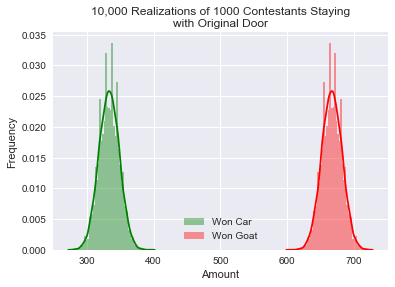

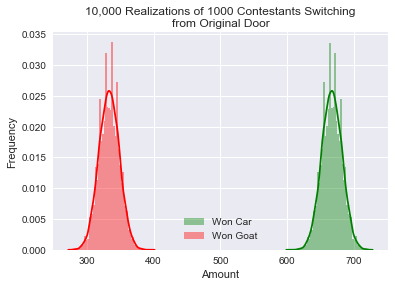

,Stay_Car_Num,Stay_Car_Proba,Stay_Goat_Num,Stay_Goat_Proba,Switch_Car_Num,Switch_Goat_Num,Switch_Goat_Proba,Swtich_Car_Proba
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,333.458000,0.333458,666.542000,0.666542,666.542000,333.458000,0.333458,0.666542
std,15.033098,0.015033,15.033098,0.015033,15.033098,15.033098,0.015033,0.015033
min,280.000000,0.280000,606.000000,0.606000,606.000000,280.000000,0.280000,0.606000
25%,323.000000,0.323000,656.000000,0.656000,656.000000,323.000000,0.323000,0.656000
50%,333.000000,0.333000,667.000000,0.667000,667.000000,333.000000,0.333000,0.667000
75%,344.000000,0.344000,677.000000,0.677000,677.000000,344.000000,0.344000,0.677000
max,394.000000,0.394000,720.000000,0.720000,720.000000,394.000000,0.394000,0.720000


In [10]:
sns.distplot(MontyRealizations['Stay_Car_Num'], color='g', label='Won Car')
sns.distplot(MontyRealizations['Stay_Goat_Num'], color='r', label='Won Goat')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.title('10,000 Realizations of 1000 Contestants Staying\nwith Original Door')
plt.show()

sns.distplot(MontyRealizations['Switch_Car_Num'], color='g', label='Won Car')
sns.distplot(MontyRealizations['Switch_Goat_Num'], color='r', label='Won Goat')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.title('10,000 Realizations of 1000 Contestants Switching\nfrom Original Door')
plt.show()
MontyRealizations.describe()

#### Conclusion: Taylor from Marketing should switch when he is a contestant on the show.